In [145]:
import pandas as pd
import numpy as np
import os
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

In [146]:
df = wrangle.prep_bees()

In [147]:
df

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
2184,alabama,2022,annual,33,36.488812,34.260096,316,212,369,100.000000,100.000000
2236,alabama,2022,summer,40,23.462783,25.660329,401,145,473,100.000000,100.000000
2288,alabama,2022,winter,42,19.053254,18.196327,747,161,684,100.000000,100.000000
2187,arkansas,2022,annual,18,51.254480,53.867865,152,143,136,94.444444,97.368421
2239,arkansas,2022,summer,22,14.383562,14.504890,181,42,250,95.454545,97.790055
...,...,...,...,...,...,...,...,...,...,...,...
147,utah,2008,winter,28,24.781100,42.183693,17709,4500,13659,100.000000,100.000000
151,west_virginia,2008,winter,17,51.566202,30.333759,3399,1959,1840,94.117647,63.959988
4831,west_virginia,2008,winter,16,35.130581,27.295408,2174,834,1540,100.000000,100.000000
152,wisconsin,2008,winter,15,33.831962,48.489233,6122,2714,5308,93.333333,56.713492


In [148]:
df = df[df.season == 'annual']

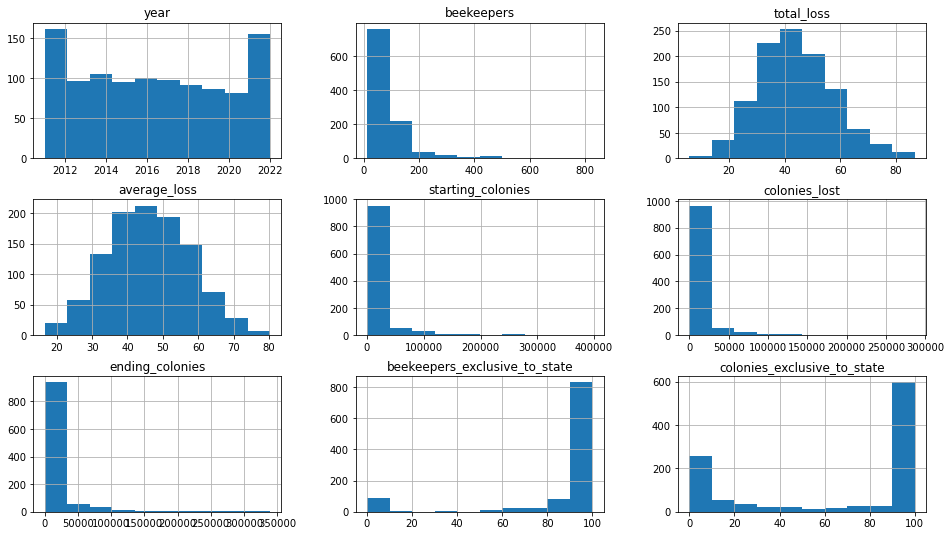

In [149]:
df.hist(figsize=[16,9])
plt.show()

### Distribution for total_loss and average_loss is normal. The starting_colonies, colonies_lost, and ending_colonies columns are skewed, possibly due to an extreme outlier.

In [150]:
df.describe()

,year,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,2016.379439,84.771963,44.178617,46.041838,15875.586916,10408.074766,15675.825234,86.604388,64.804368
std,3.321268,100.339677,13.660125,11.647444,43204.389246,28205.483202,42109.813700,28.138881,42.864251
min,2011.000000,11.000000,5.707065,16.544983,27.000000,16.000000,22.000000,0.000000,0.000000
25%,2014.000000,26.000000,34.536716,37.711144,358.000000,288.000000,346.000000,91.176471,12.007747
50%,2016.000000,57.000000,42.643478,45.533138,1007.500000,765.000000,907.000000,98.098252,97.336502
75%,2019.000000,101.750000,53.108463,54.267300,8629.000000,5539.500000,8801.500000,100.000000,100.000000
max,2022.000000,828.000000,86.889007,80.343204,397076.000000,286768.000000,339129.000000,100.000000,100.000000


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 2184 to 5196
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          1070 non-null   object 
 1   year                           1070 non-null   int64  
 2   season                         1070 non-null   object 
 3   beekeepers                     1070 non-null   int64  
 4   total_loss                     1070 non-null   float64
 5   average_loss                   1070 non-null   float64
 6   starting_colonies              1070 non-null   int64  
 7   colonies_lost                  1070 non-null   int64  
 8   ending_colonies                1070 non-null   int64  
 9   beekeepers_exclusive_to_state  1070 non-null   float64
 10  colonies_exclusive_to_state    1070 non-null   float64
dtypes: float64(4), int64(5), object(2)
memory usage: 100.3+ KB


In [152]:
df[df.ending_colonies == df.ending_colonies.max()]

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
784,california,2013,annual,212,45.817123,46.902526,397076,286768,339129,64.150943,11.513161


In [153]:
df[df.colonies_lost == df.colonies_lost.max()]

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
784,california,2013,annual,212,45.817123,46.902526,397076,286768,339129,64.150943,11.513161


In [154]:
df[df.starting_colonies == df.starting_colonies.max()]

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
784,california,2013,annual,212,45.817123,46.902526,397076,286768,339129,64.150943,11.513161


In [155]:
df[df.beekeepers == df.beekeepers.max()]

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
973,pennsylvania,2014,annual,828,45.755071,54.477853,20925,17661,20938,97.94686,20.683393


In [156]:
df['colonies_net_gain'] = df.ending_colonies - df.starting_colonies

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_9795/3791258066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['colonies_net_gain'] = df.ending_colonies - df.starting_colonies


In [157]:
df

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,colonies_net_gain
2184,alabama,2022,annual,33,36.488812,34.260096,316,212,369,100.000000,100.000000,53
2187,arkansas,2022,annual,18,51.254480,53.867865,152,143,136,94.444444,97.368421,-16
6867,arkansas,2022,annual,17,49.411765,52.869897,148,126,129,100.000000,100.000000,-19
2188,california,2022,annual,89,33.269667,42.818791,166009,85526,171543,67.415730,25.320314,5534
4528,california,2022,annual,29,36.752854,35.811393,123975,73971,127295,0.000000,0.000000,3320
...,...,...,...,...,...,...,...,...,...,...,...,...
5194,washington,2011,annual,61,36.026936,38.047901,340,214,380,100.000000,100.000000,40
515,west_virginia,2011,annual,25,78.585462,40.723147,193,400,109,92.000000,48.704663,-84
5195,west_virginia,2011,annual,23,41.250000,36.881733,94,66,94,100.000000,100.000000,0
516,wisconsin,2011,annual,50,34.585065,51.882699,3773,2413,4564,92.000000,14.020673,791


In [158]:
df['beekeeper_colony_ratio'] = df.ending_colonies / df.beekeepers

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_9795/1408302553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['beekeeper_colony_ratio'] = df.ending_colonies / df.beekeepers


In [159]:
df.ending_colonies / df.beekeepers

2184      11.181818
2187       7.555556
6867       7.588235
2188    1927.449438
4528    4389.482759
           ...     
5194       6.229508
515        4.360000
5195       4.086957
516       91.280000
5196      11.695652
Length: 1070, dtype: float64

In [160]:
df

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,colonies_net_gain,beekeeper_colony_ratio
2184,alabama,2022,annual,33,36.488812,34.260096,316,212,369,100.000000,100.000000,53,11.181818
2187,arkansas,2022,annual,18,51.254480,53.867865,152,143,136,94.444444,97.368421,-16,7.555556
6867,arkansas,2022,annual,17,49.411765,52.869897,148,126,129,100.000000,100.000000,-19,7.588235
2188,california,2022,annual,89,33.269667,42.818791,166009,85526,171543,67.415730,25.320314,5534,1927.449438
4528,california,2022,annual,29,36.752854,35.811393,123975,73971,127295,0.000000,0.000000,3320,4389.482759
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194,washington,2011,annual,61,36.026936,38.047901,340,214,380,100.000000,100.000000,40,6.229508
515,west_virginia,2011,annual,25,78.585462,40.723147,193,400,109,92.000000,48.704663,-84,4.360000
5195,west_virginia,2011,annual,23,41.250000,36.881733,94,66,94,100.000000,100.000000,0,4.086957
516,wisconsin,2011,annual,50,34.585065,51.882699,3773,2413,4564,92.000000,14.020673,791,91.280000


In [192]:
df[df.state=='district_of_columbia']

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,colonies_net_gain,beekeeper_colony_ratio
2191,district_of_columbia,2022,annual,20,56.571429,47.980159,87,99,76,90.0,83.908046,-11,3.800000
6871,district_of_columbia,2022,annual,18,58.940397,46.521164,73,89,62,100.0,100.000000,-11,3.444444
1411,district_of_columbia,2017,annual,20,38.679245,54.864219,68,41,65,90.0,80.882353,-3,3.250000
6091,district_of_columbia,2017,annual,18,39.560440,55.783476,55,36,55,100.0,100.000000,0,3.055556


In [194]:
df[df.state=='non_continental_usa']

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,colonies_net_gain,beekeeper_colony_ratio
1454,non_continental_usa,2017,annual,11,25.581395,23.993506,76,22,64,100.000000,100.000000,-12,5.818182
1298,non_continental_usa,2016,annual,46,38.146021,18.417953,2507,1395,2262,97.826087,99.760670,-245,49.173913
5978,non_continental_usa,2016,annual,45,38.208710,18.827240,2501,1395,2256,100.000000,100.000000,-245,50.133333
1142,non_continental_usa,2015,annual,28,13.925411,21.192791,8696,1684,10409,100.000000,100.000000,1713,371.750000
986,non_continental_usa,2014,annual,67,24.938126,26.498492,11804,4232,12738,98.507463,53.405625,934,190.119403
5666,non_continental_usa,2014,annual,66,21.731493,26.479108,6304,1732,6238,100.000000,100.000000,-66,94.515152
830,non_continental_usa,2013,annual,41,7.499751,25.045593,7985,752,9275,97.560976,93.738259,1290,226.219512
5510,non_continental_usa,2013,annual,40,5.707065,24.681167,7485,542,8955,100.000000,100.000000,1470,223.875000
674,non_continental_usa,2012,annual,21,20.455204,35.231924,11112,2822,10974,100.000000,100.000000,-138,522.571429
518,non_continental_usa,2011,annual,32,7.907152,51.735113,4999,419,4880,100.000000,100.000000,-119,152.500000


In [161]:
df = df[df.state != 'multistates']

In [196]:
df[df.state=='alabama']

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,colonies_net_gain,beekeeper_colony_ratio
2184,alabama,2022,annual,33,36.488812,34.260096,316,212,369,100.000000,100.000000,53,11.181818
2028,alabama,2021,annual,48,47.497446,51.382641,644,465,514,100.000000,100.000000,-130,10.708333
1872,alabama,2020,annual,61,46.684350,44.344061,788,704,804,98.360656,99.365482,16,13.180328
6552,alabama,2020,annual,60,45.853001,43.483129,783,680,803,100.000000,100.000000,20,13.383333
1716,alabama,2019,annual,61,33.217542,30.259503,1493,765,1538,98.360656,93.636973,45,25.213115
6396,alabama,2019,annual,60,32.443626,29.994598,1398,705,1468,100.000000,100.000000,70,24.466667
1560,alabama,2018,annual,52,46.058559,39.552827,1228,818,958,96.153846,99.348534,-270,18.423077
6240,alabama,2018,annual,50,46.123147,39.934940,1220,809,945,100.000000,100.000000,-275,18.900000
1404,alabama,2017,annual,38,34.904014,42.703580,367,200,373,97.368421,97.547684,6,9.815789
6084,alabama,2017,annual,37,34.759358,42.731604,358,195,366,100.000000,100.000000,8,9.891892


In [197]:
df[df.state=='california']

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,colonies_net_gain,beekeeper_colony_ratio
2188,california,2022,annual,89,33.269667,42.818791,166009,85526,171543,67.415730,25.320314,5534,1927.449438
4528,california,2022,annual,29,36.752854,35.811393,123975,73971,127295,0.000000,0.000000,3320,4389.482759
6868,california,2022,annual,60,20.706772,46.205700,42034,11555,44248,100.000000,100.000000,2214,737.466667
2032,california,2021,annual,100,42.317103,46.601753,81900,53094,72373,68.000000,14.927961,-9527,723.730000
4372,california,2021,annual,32,45.552153,41.215949,69674,46711,55833,0.000000,0.000000,-13841,1744.781250
6712,california,2021,annual,68,27.845395,49.136249,12226,6383,16540,100.000000,100.000000,4314,243.235294
1876,california,2020,annual,100,41.961520,46.179762,171892,127477,176318,63.000000,21.270333,4426,1763.180000
4216,california,2020,annual,37,47.667045,48.148486,135330,120876,132708,0.000000,0.000000,-2622,3586.702703
6556,california,2020,annual,63,13.146522,45.023528,36562,6601,43610,100.000000,100.000000,7048,692.222222
1720,california,2019,annual,130,39.780169,45.243440,212865,119722,181237,56.153846,8.634111,-31628,1394.130769


In [195]:
df.groupby('state').year.value_counts()

state      year
alabama    2011    2
           2012    2
           2013    2
           2014    2
           2015    2
                  ..
wisconsin  2022    2
wyoming    2016    2
           2017    2
           2013    1
           2015    1
Name: year, Length: 532, dtype: int64

In [162]:
def split_data(df):
    '''This function takes in a dataframe and returns three dataframes, a training dataframe with 60 percent 
        of the data, a validate dataframe with 20 percent of the data and test dataframe with 20 percent of the data.'''
    # split data into train and test with a test size of 20 percent and random state of 825
    train, test = train_test_split(df, test_size=.2, random_state=825)
    # split train again into train and validate with a validate size of 25 percent of train
    train, validate = train_test_split(train, test_size=.25, random_state=825)
    # return three dataframes, 60/20/20 split
    return train, validate, test

In [163]:
train, validate, test = split_data(df)

In [164]:
train.shape, validate.shape, test.shape

((634, 13), (212, 13), (212, 13))

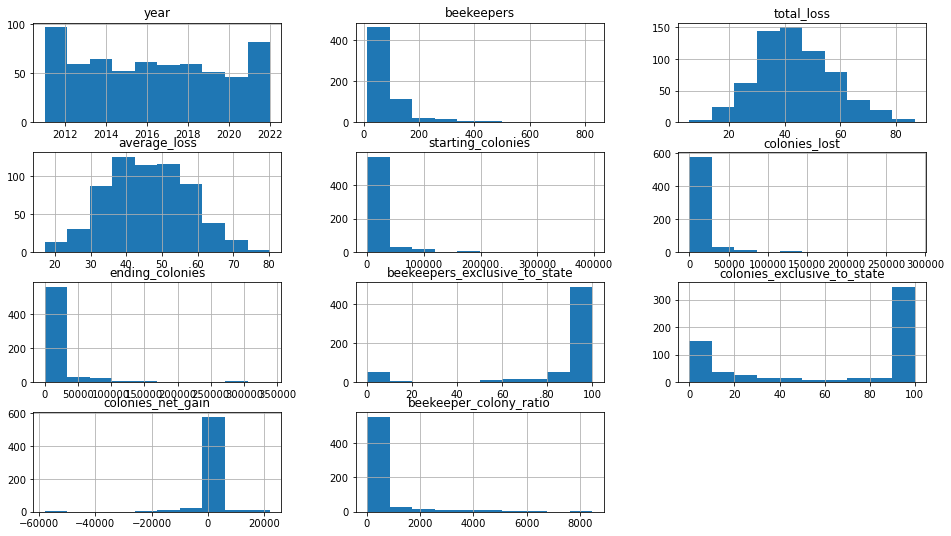

In [165]:
train.hist(figsize=[16,9])
plt.show()

In [166]:
df[df.colonies_net_gain == df.colonies_net_gain.min()]

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,colonies_net_gain,beekeeper_colony_ratio
784,california,2013,annual,212,45.817123,46.902526,397076,286768,339129,64.150943,11.513161,-57947,1599.665094


<Figure size 1152x648 with 0 Axes>

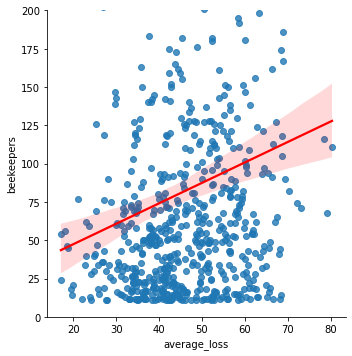

In [167]:
# relationship between total_loss and beekeepers with regression line
plt.figure(figsize=[16,9])
sns.lmplot(x='average_loss', y='beekeepers', data=train, line_kws={'color': 'red'})
plt.ylim([0,200])
plt.title('')
plt.show()

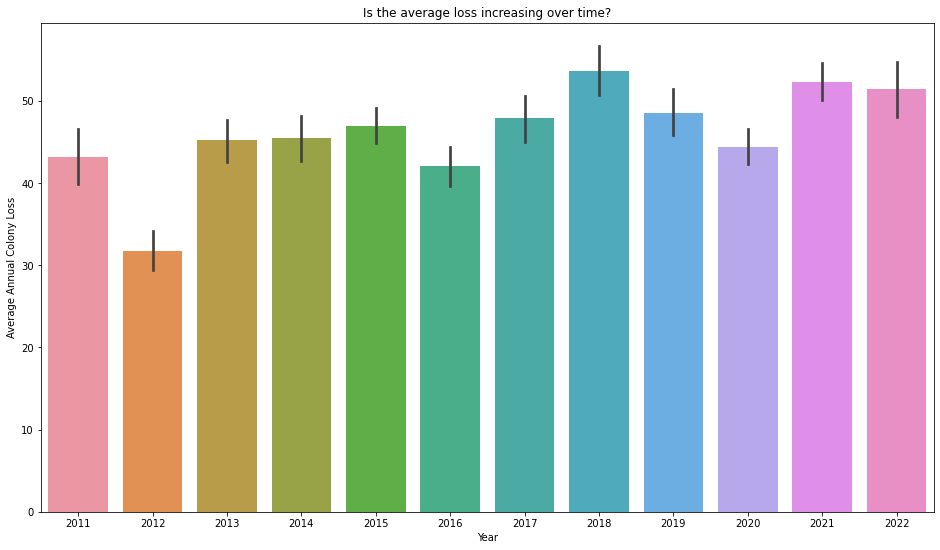

In [168]:
plt.figure(figsize=[16,9])
sns.barplot(x='year', y='average_loss', data=train)
plt.ylabel('Average Annual Colony Loss')
plt.xlabel('Year')
plt.title('Is the average loss increasing over time?')
plt.show()

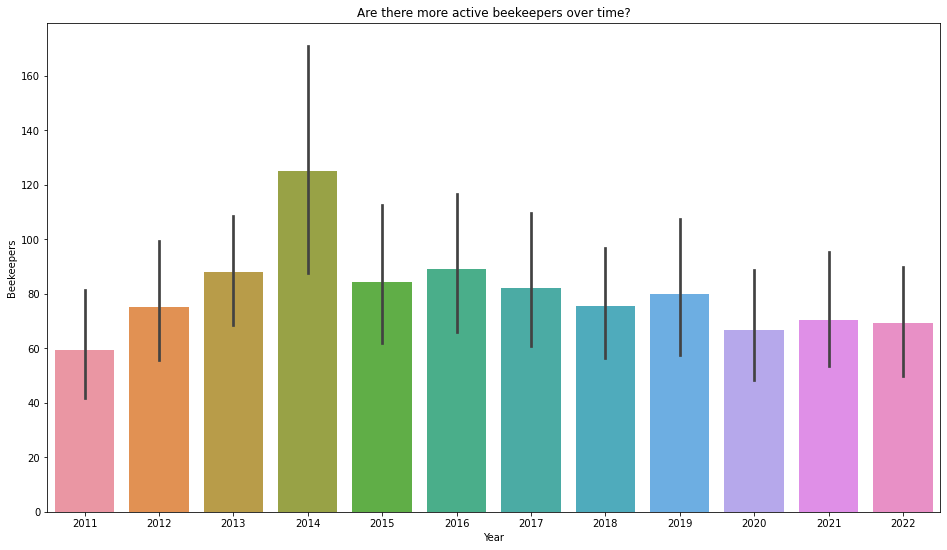

In [169]:
plt.figure(figsize=[16,9])
sns.barplot(x='year', y='beekeepers', data=train)
plt.ylabel('Beekeepers')
plt.xlabel('Year')
plt.title('Are there more active beekeepers over time?')
plt.show()

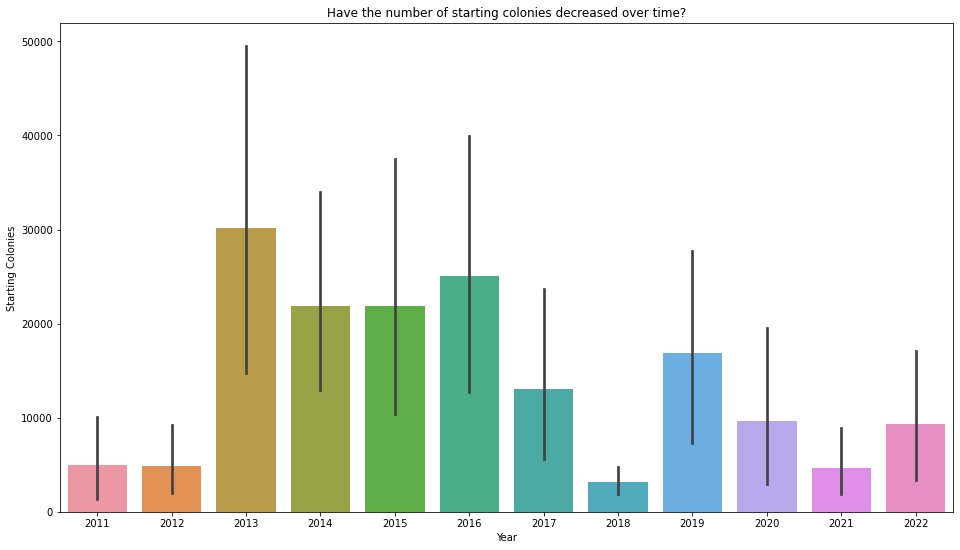

In [170]:
plt.figure(figsize=[16,9])
sns.barplot(x='year', y='starting_colonies', data=train)
plt.ylabel('Starting Colonies')
plt.xlabel('Year')
plt.title('Have the number of starting colonies decreased over time?')
plt.show()

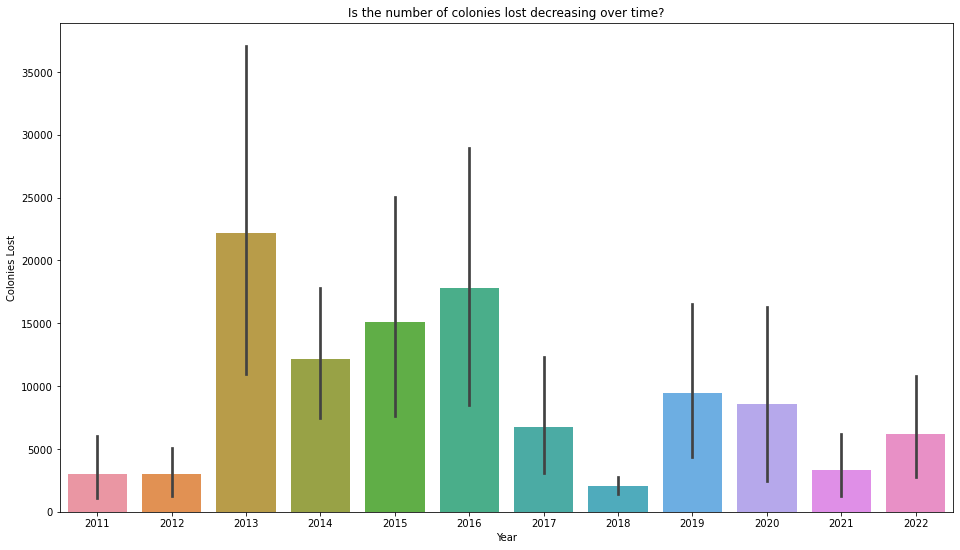

In [171]:
plt.figure(figsize=[16,9])
sns.barplot(x='year', y='colonies_lost', data=train)
plt.ylabel('Colonies Lost')
plt.xlabel('Year')
plt.title('Is the number of colonies lost decreasing over time?')
plt.show()

In [172]:
bee_corr = train.corr()
bee_corr

,year,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,colonies_net_gain,beekeeper_colony_ratio
year,1.000000,-0.044961,0.232600,0.308288,-0.062432,-0.061597,-0.066597,0.078259,0.077762,-0.013007,-0.030758
beekeepers,-0.044961,1.000000,0.050826,0.152512,0.000877,0.009850,0.001774,0.225336,0.078698,0.006397,-0.183314
total_loss,0.232600,0.050826,1.000000,0.511462,-0.112421,-0.040676,-0.137833,0.128717,0.143359,-0.156328,-0.149688
average_loss,0.308288,0.152512,0.511462,1.000000,-0.092376,-0.064220,-0.098460,0.137865,0.019137,-0.018665,-0.107836
starting_colonies,-0.062432,0.000877,-0.112421,-0.092376,1.000000,0.978775,0.991974,-0.558128,-0.456550,-0.346202,0.656897
colonies_lost,-0.061597,0.009850,-0.040676,-0.064220,0.978775,1.000000,0.959256,-0.538484,-0.456483,-0.425397,0.636960
ending_colonies,-0.066597,0.001774,-0.137833,-0.098460,0.991974,0.959256,1.000000,-0.566722,-0.464659,-0.224802,0.672576
beekeepers_exclusive_to_state,0.078259,0.225336,0.128717,0.137865,-0.558128,-0.538484,-0.566722,1.000000,0.630694,0.096226,-0.793590
colonies_exclusive_to_state,0.077762,0.078698,0.143359,0.019137,-0.456550,-0.456483,-0.464659,0.630694,1.000000,0.070704,-0.514812
colonies_net_gain,-0.013007,0.006397,-0.156328,-0.018665,-0.346202,-0.425397,-0.224802,0.096226,0.070704,1.000000,-0.071964


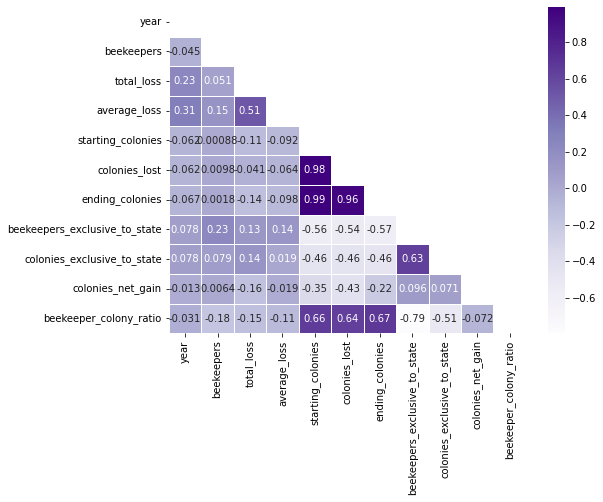

In [174]:
plt.figure(figsize=(8,6))
sns.heatmap(bee_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(bee_corr))

plt.show()

In [175]:
cross = pd.crosstab(train.average_loss, train.year)
corr1 = cross.corr()
corr1

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
year,,,,,,,,,,,,
2011,1.000000,-0.082831,-0.093571,-0.097818,-0.086509,-0.095284,-0.092707,-0.093571,-0.085599,-0.080949,-0.077087,-0.075103
2012,-0.082831,1.000000,-0.092532,-0.096732,-0.085548,-0.094226,-0.091678,-0.092532,-0.084649,-0.080050,-0.076232,-0.074269
2013,-0.093571,-0.092532,1.000000,-0.109275,-0.096641,-0.106443,-0.103565,-0.104530,-0.095625,-0.090429,-0.086116,-0.083899
2014,-0.097818,-0.096732,-0.109275,1.000000,-0.101028,-0.111275,-0.108266,-0.109275,-0.099966,-0.094535,-0.090025,-0.087708
2015,-0.086509,-0.085548,-0.096641,-0.101028,1.000000,-0.098410,-0.095749,-0.096641,-0.088408,-0.083605,-0.079617,-0.077567
2016,-0.095284,-0.094226,-0.106443,-0.111275,-0.098410,1.000000,-0.105461,-0.106443,-0.097375,-0.092085,-0.087692,-0.085435
2017,-0.092707,-0.091678,-0.103565,-0.108266,-0.095749,-0.105461,1.000000,-0.103565,-0.094742,-0.089595,-0.085321,-0.083124
2018,-0.093571,-0.092532,-0.104530,-0.109275,-0.096641,-0.106443,-0.103565,1.000000,-0.095625,-0.090429,-0.086116,-0.083899
2019,-0.085599,-0.084649,-0.095625,-0.099966,-0.088408,-0.097375,-0.094742,-0.095625,1.000000,-0.082726,-0.078780,-0.076752


<AxesSubplot:xlabel='year', ylabel='year'>

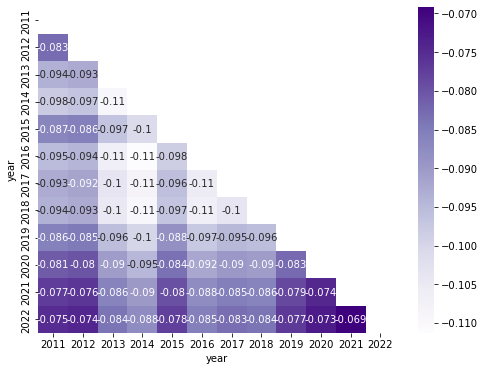

In [176]:
plt.figure(figsize=[8,6])
sns.heatmap(corr1, cmap='Purples', annot=True, mask=np.triu(corr1))

<AxesSubplot:xlabel='year', ylabel='average_loss'>

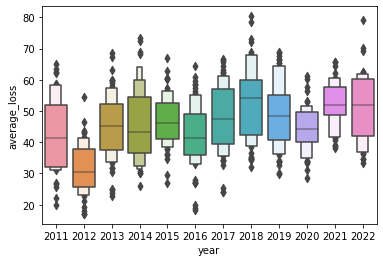

In [177]:
fig, ax = plt.subplots()
sns.boxenplot(x='year', y='average_loss', data=train)
#sns.regplot(x='year', y='average_loss', data=train, color='red')

In [178]:
X_train = train.drop(columns='total_loss')
y_train = train.total_loss
X_validate = validate.drop(columns='total_loss')
y_validate = validate.total_loss
X_test = test.drop(columns='total_loss')
y_test = test.total_loss

In [179]:
train.state.nunique()

49

<Figure size 1152x648 with 0 Axes>

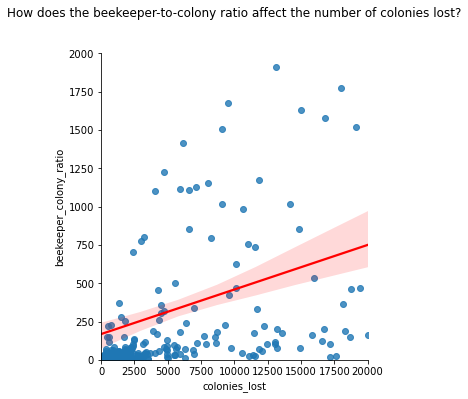

In [180]:
# relationship between total_loss and beekeepers with regression line
plt.figure(figsize=[16,9])
sns.lmplot(x='colonies_lost', y='beekeeper_colony_ratio', data=train, line_kws={'color': 'red'})
plt.xlim([0,20000])
plt.ylim([0,2000])
plt.title('How does the beekeeper-to-colony ratio affect the number of colonies lost?', y=1.1)
plt.show()

<AxesSubplot:xlabel='state'>

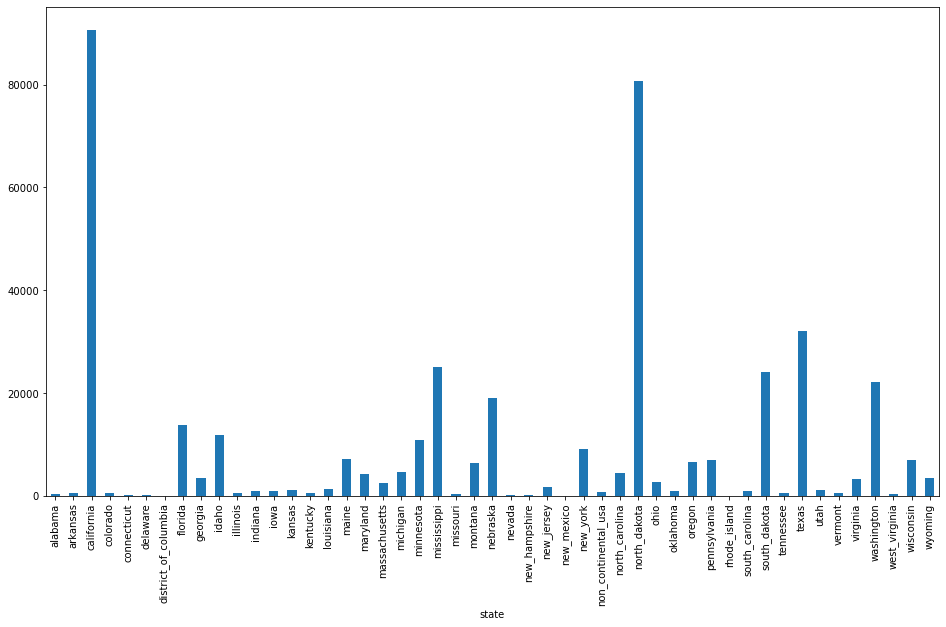

In [181]:
train.groupby('state').colonies_lost.mean().plot.bar(figsize=[16,9])

<AxesSubplot:xlabel='state'>

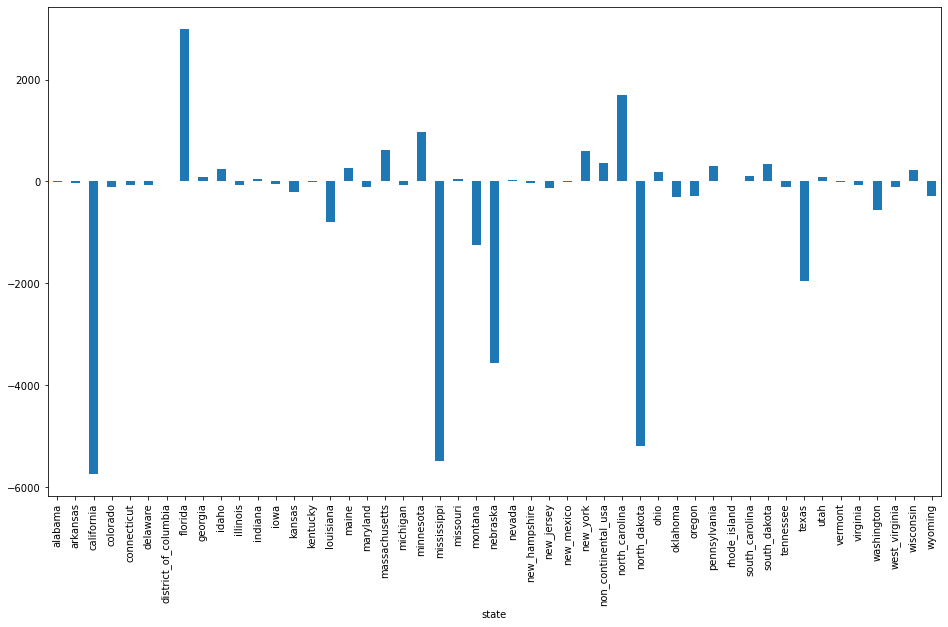

In [189]:
train.groupby('state').colonies_net_gain.mean().plot.bar(figsize=[16,9])

<AxesSubplot:xlabel='state'>

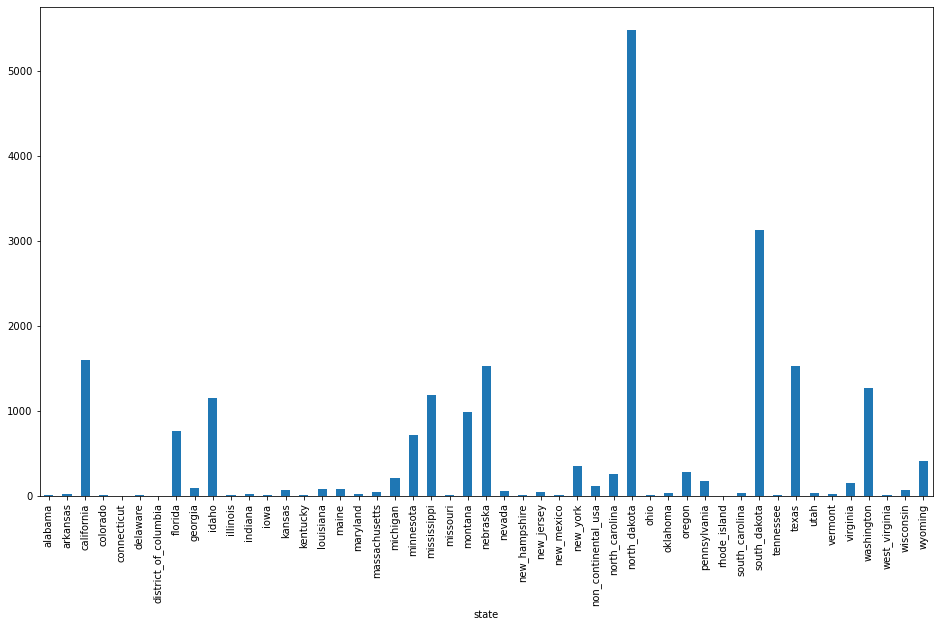

In [183]:
train.groupby('state').beekeeper_colony_ratio.mean().plot.bar(figsize=[16,9])

<AxesSubplot:xlabel='state'>

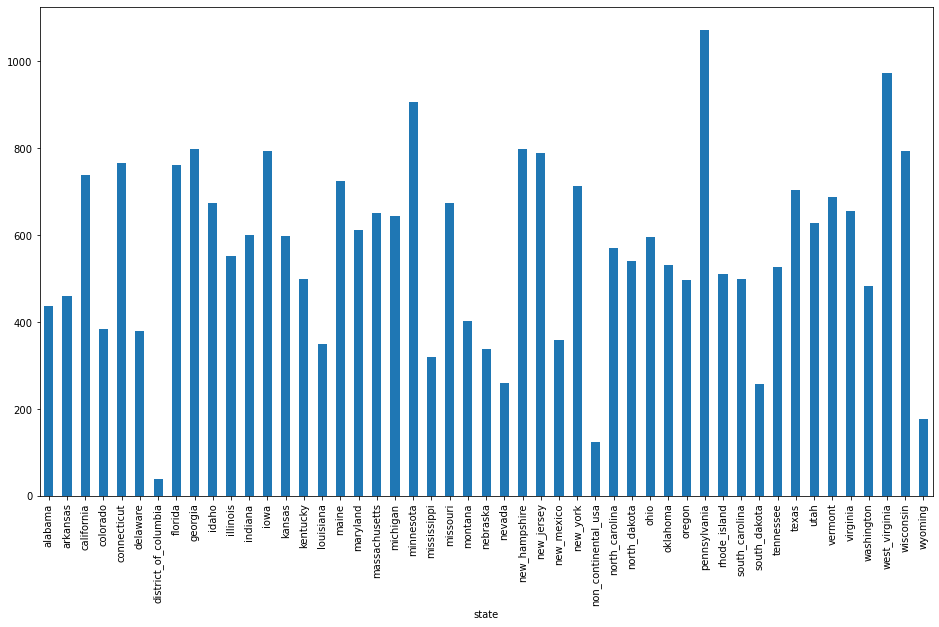

In [185]:
train.groupby('state').colonies_lost.sum().plot.bar(figsize=[16,9])

<AxesSubplot:xlabel='state'>

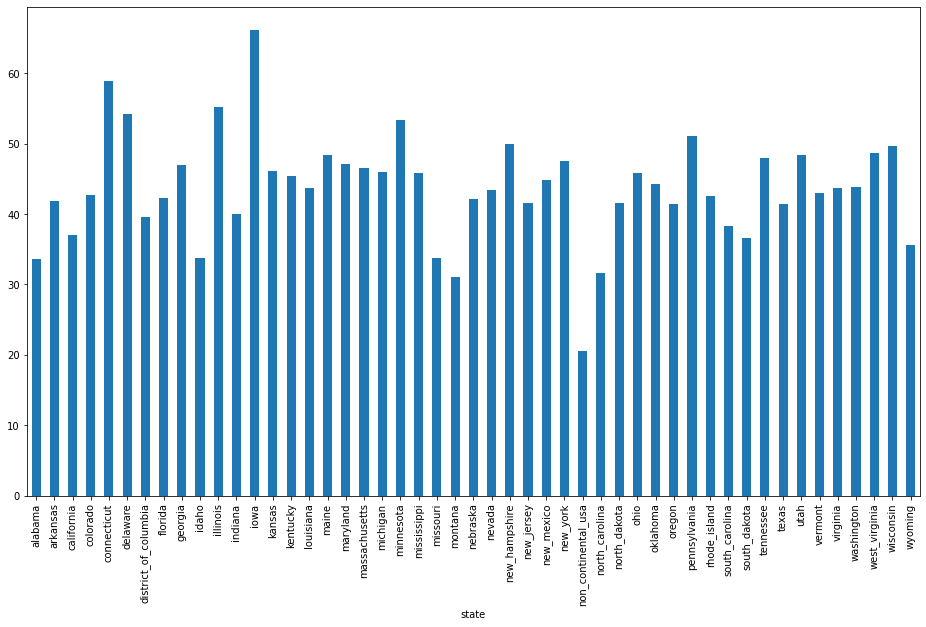

In [186]:
train.groupby('state').total_loss.mean().plot.bar(figsize=[16,9])